November: Part 3 - This notebook is a continuation of gyre_runs.ipynb and gyre_runs_mackenzie01.ipynb. The configuration used to produce these results is gyre_mackenzie02. Parameters explored: ln_tsd_init, ln_tsd_tradmp, sn_tem, sn_sal.

Changes since Part 2:
* matlab scaling factors script has transposed lons and lats so it won't flip the dimensions
* masking land using [Nancy notebook](http://nbviewer.jupyter.org/urls/bitbucket.org/salishsea/analysis-nancy/raw/tip/notebooks/Masking%20with%20tmask.ipynb)
* now, we have the realistic bathymetry that matches the idealized bathymetry
* the idealized bathymetry has been refined (slope)
* the stratification based on Arctic data is inputted into the model

In [76]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/modules/')
import functions_plot

from salishsea_tools import nc_tools

In [77]:
def plot_gyre_times(gridT, var, depth_ind, time_inds, cmax, cmaps, max_min, supttl):
    cmin = -cmax
    cmaps.set_bad('wheat')
    fig, ax = plt.subplots(1, len(time_inds), figsize=(20, 4.5), sharex=True, sharey=True)
    for i, n in zip(time_inds, np.arange(len(time_inds))):
        if max_min == True:
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps, vmin = cmin, vmax = cmax)
            if n == 0:
                cbar = fig.colorbar(c, ax=ax[0])
        elif max_min == False:
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps)
            cbar = fig.colorbar(c, ax=ax[n])
        timestamp = nc_tools.timestamp(gridT,i).format('MMM DD HH:mm')
        ax[n].set_title(timestamp, fontsize=16)
        ax[n].set_xlim(0,gridT.dimensions['x'].size)
        ax[n].set_ylim(0,gridT.dimensions['y'].size)
        ax[n].xaxis.set_visible(False); ax[n].yaxis.set_visible(False)
    title = supttl
    fig.tight_layout(); fig.subplots_adjust(top=0.85); fig.suptitle(title, fontsize=20)
    return fig, ax

def plot_vars(gridT, all_vars, depth_ind, time_ind, cmaxs, cmaps, max_min, supttl, ttls):
    cmins = [-x for x in cmaxs]
    cmaps.set_bad('wheat')
    fig, ax = plt.subplots(1, len(all_vars), figsize=(20, 4.5), sharex=True, sharey=True)
    for var, cmin, cmax, n, ttl in zip(all_vars, cmins, cmaxs, np.arange(len(all_vars)), ttls):
        if max_min == True:
            c = ax[n].pcolormesh(var[time_ind,depth_ind,:,:], cmap=cmaps, vmin = cmin, vmax = cmax)
            cbar = fig.colorbar(c, ax=ax[n])
        elif max_min == False:
            c = ax[n].pcolormesh(var[time_ind,depth_ind,:,:], cmap=cmaps)
            cbar = fig.colorbar(c, ax=ax[n])
        timestamp = nc_tools.timestamp(gridT,time_ind).format('HH:mm')
        ax[n].xaxis.set_visible(False); ax[n].yaxis.set_visible(False)
        ax[n].set_title(ttl, fontsize=16)
    title = supttl + ' (' + str(int(gridT['deptht'][depth_ind])) + 'm, ' + timestamp + ')'
    fig.tight_layout(); fig.subplots_adjust(top=0.85); fig.suptitle(title, fontsize=20)
    return fig

In [68]:
path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run01'
gridT_I1, lon_I1, lat_I1, tem_I1, sal_I1, ssh_I1, U_I1, V_I1, W_I1 = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_realistic/Run01'
gridT_R1, lon_R1, lat_R1, tem_R1, sal_R1, ssh_R1, U_R1, V_R1, W_R1 = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run02'
gridT_I2, lon_I2, lat_I2, tem_I2, sal_I2, ssh_I2, U_I2, V_I2, W_I2 = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_realistic/Run02'
gridT_R2, lon_R2, lat_R2, tem_R2, sal_R2, ssh_R2, U_R2, V_R2, W_R2 = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run03'
gridT_I3, lon_I3, lat_I3, tem_I3, sal_I3, ssh_I3, U_I3, V_I3, W_I3 = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run04'
gridT_I4, lon_I4, lat_I4, tem_I4, sal_I4, ssh_I4, U_I4, V_I4, W_I4 = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run05'
gridT_I5, lon_I5, lat_I5, tem_I5, sal_I5, ssh_I5, U_I5, V_I5, W_I5 = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run06'
gridT_I6, lon_I6, lat_I6, tem_I6, sal_I6, ssh_I6, U_I6, V_I6, W_I6 = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run07_test'
gridT_I7t, lon_I7t, lat_I7t, tem_I7t, sal_I7t, ssh_I7t, U_I7t, V_I7t, W_I7t = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run07'
gridT_I7, lon_I7, lat_I7, tem_I7, sal_I7, ssh_I7, U_I7, V_I7, W_I7 = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run08'
gridT_I8, lon_I8, lat_I8, tem_I8, sal_I8, ssh_I8, U_I8, V_I8, W_I8 = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run10'
gridT_I10, lon_I10, lat_I10, tem_I10, sal_I10, ssh_I10, U_I10, V_I10, W_I10 = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run11'
gridT_I11, lon_I11, lat_I11, tem_I11, sal_I11, ssh_I11, U_I11, V_I11, W_I11 = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run12/visc_250'
gridT_I12a, lon_I12a, lat_I12a, tem_I12a, sal_I12a, ssh_I12a, U_I2a, V_I12a, W_I12a = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run12/visc_450'
gridT_I12b, lon_I12b, lat_I12b, tem_I12b, sal_I12b, ssh_I12b, U_I12b, V_I12b, W_I12b = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run13'
gridT_I13, lon_I13, lat_I13, tem_I13, sal_I13, ssh_I13, U_I13, V_I13, W_I13 = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run14'
gridT_I14, lon_I14, lat_I14, tem_I14, sal_I14, ssh_I14, U_I14, V_I14, W_I14 = functions_plot.load_model_output(path, cfg)

path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run15'
gridT_I15, lon_I15, lat_I15, tem_I15, sal_I15, ssh_I15, U_I15, V_I15, W_I15 = functions_plot.load_model_output(path, cfg)

## Summary


* cp_cfg name
* bathy_meter.nc and coordinates.nc
* nn_bathy = 1 (0 for compute)
* jphgr_msh = 0 (5 for gyre)
* jperio = 1 (cyclic)
* ln_zco, ln_zps
* jpidta = jpiglo, jpjdta = jpjglo, jpkdta 


|Parameter      |Run01(Id)|Run01(Re)|Run08/15(Id)|Run09(Id)|Run10-14(Id)|Run15(Id)|
|---------------|---------|---------|--------- |---------|---------|
|cp_cfg         |ideal    |real     |ideal     |         |         |
|ln_bt_nn_auto  |False    |True     |False     |         |         |
|rn_bt_cmax     |NA       |0.05     |NA        |         |         |
|rn_rdt         |20       |10       |20        |10       |8        |
|nn_baro        |4        |NA       |4         |         |         |
|calc nn_baro   |NA       |5        |NA        |         |         |          
|nn_itend       |2160(12h)|4320(12h)|21600(5d) |8640(24h)|2700(6h) |
|nn_write       |360(1h)  |---      |*1080(6h)*|360 (1h) |450(1h)  | 
|nn_tau000 [ts] |540(3h)  |1080     |4320(1d)  |1080 (3h)|900(2h)  |
|rn_utau0 [N/m2]|-5.0     |-5.0     |-5.0      |         |         |-0.1|
|rn_vtau0 [N/m2]|0        |0        |0         |         |         |
|jperio         |cyclic   |cyclic   |cyclic    |closed   |either   |
|status         | ✓       | ✓      |✓          |3064     |✓,✓,1968|

**OJO: nn_write and iodef.xml**

* remember you have to reduce timestep and then consider the wind forcing
* running longer simulations: cd EXP00 >> ./opa & >> exit >> ps -aux |grep imachu

In [29]:
# calculate nn_baro using rn_rdt and cmax
g = 9.81; cmax = 0.05; dx = 4501; H = 1300; dt_clinic = 10 #(rn_rdt)
u = np.sqrt(g * H)
dt_tropic = (cmax * dx) / u
iterations = dt_clinic / dt_tropic
iterations

5.0179596244528888

# Run01: Idealized vs Realistic

These runs use a configuration similar to the ones that are proven to run from gyre_runs_mackenzie01.ipynb. Both runs try to simulate the same scenario. The realistic needed a smaller timestep so nn_itend and nn_tau were modified to accommodate this change. The original gyre stratification was used.

1. mackenzie_canyon/bathymetry/initial_sets/idealized/**ideal_bathy_01.nc**
2. mackenzie_canyon/bathymetry/initial_sets/realistic/**real_bathy_01.nc**
3. mackenzie_canyon/bathymetry/initial_sets/coordinates/**coords_01.nc**

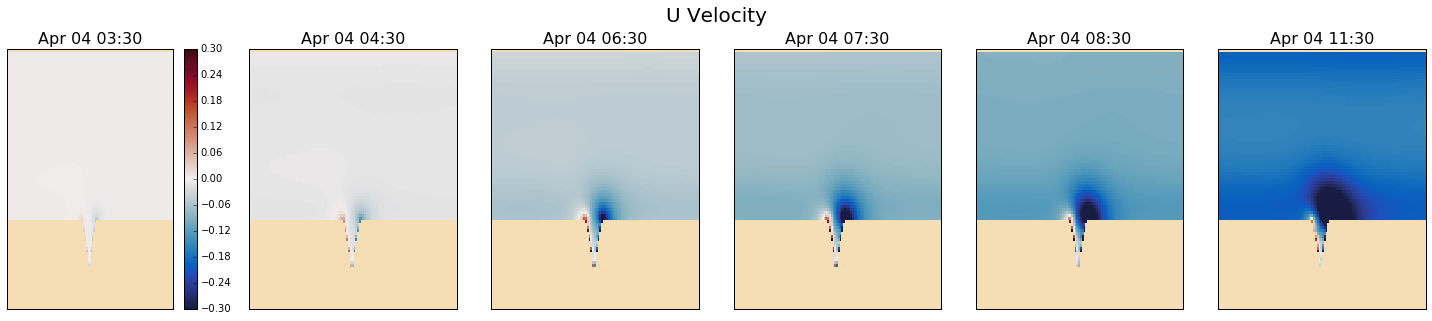

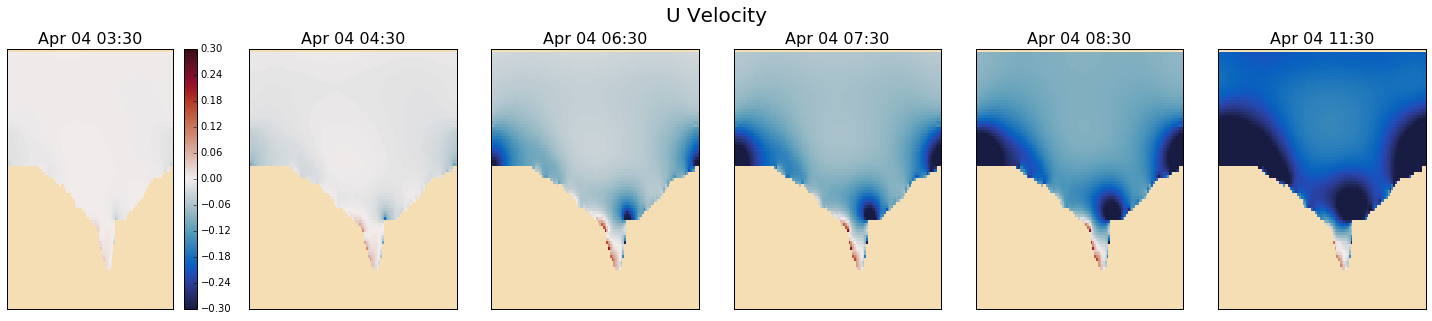

In [31]:
dep = 8; time_inds = [3,4,6,7,8,11]; bd = 0.3; max_min = True; supttl = 'U Velocity'
fig = plot_gyre_times(gridT_I1, U_I1, dep, time_inds, bd, cmo.cm.balance, max_min, supttl)
fig = plot_gyre_times(gridT_R1, U_R1, dep, time_inds, bd, cmo.cm.balance, max_min, supttl)

# Run02: Arctic Stratification

These runs have the **same configurations** as Run01 and still use **ideal_bathy_01.nc**, **real_bathy_01.nc**, and **coords_01.nc**. What's new is that these runs use the temperature and salinity files created in prepare_stratification.ipynb.

1. mackenzie_canyon/conditions/stratification_files/**temp_strat.nc** & **temp_strat_real.nc**
2. mackenzie_canyon/conditions/stratification_files/**salt_strat.nc** & **temp_strat_real.nc**

(Pages 67 and 129) In namtsd, **ln_tsd_init** and **ln_tsd_tradmp** are True and **sn_tem** and **sn_sal** are:

| Parameter             | Description | Values|
|-----------------------|-------------|-------|
| File name             |can include directory, doesn't have to have .nc| 'temp_strat', 'salt_strat'|
| Record frequency      |contained in input file, +ive if hours, -ive if months, integer| 1|
| Variable name         |'votemper', 'vosaline'| 'votemper', 'vosaline'|
| Time interpolation    |false if forcing remains constant during each forcing period| false|
| Climatological forcing|true if input file contains climatological forcing which can be cycled in time| true|
| Open/close frequency  |forcing files have data from the beginning of one 'daily','weekLLL','monthly','yearly'| 'yearly'|


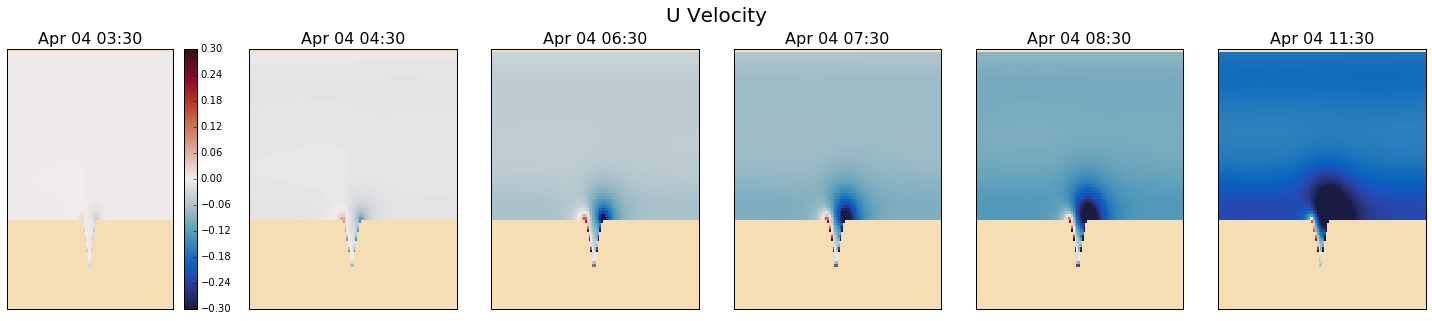

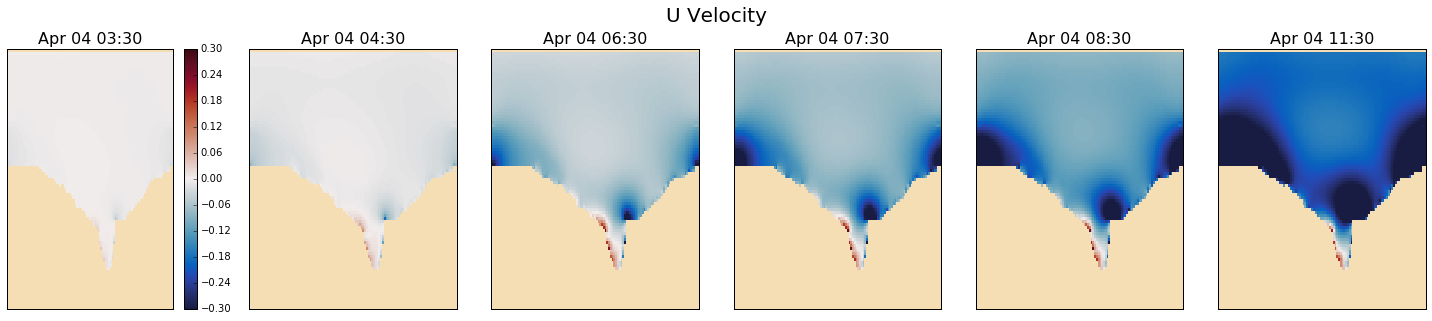

In [33]:
dep = 8; time_inds = [3,4,6,7,8,11]; bd = 0.3; max_min = True; supttl = 'U Velocity'
fig = plot_gyre_times(gridT_I2, U_I2, dep, time_inds, bd, cmo.cm.balance, max_min, supttl)
fig = plot_gyre_times(gridT_R2, U_R2, dep, time_inds, bd, cmo.cm.balance, max_min, supttl)

# Run03, 04, and 05: Lateral Boundary Conditions

These runs also use **ideal_bathy_01.nc**, **real_bathy_01.nc**, **coords_01.nc**, **temp_strat.nc**, and **salt_strat.nc**. For brevity, I only ran the idealized bathymetry to test the slip conditions.

(Page 154 to 157, diagram in page 156) In namlbc:

| Parameter             | Description | Run01 (Id & Re)| Run02 (Id & Re)| Run03 (Id)| Run04 (Id)| Run05 (Id)|
|-----------------------|------------------------------------------------------------------------|---|---|-----|-----|
|rn_shlat|**free slip** = 0, 0 < **partial slip** < 2, **no slip** = 2, **strong slip** > 2| 0 | 0 | 0.25 | 0.5 | 2.0 |

**The rest of the runs use rn_shlat=0.5.**

The [Salish Sea Green Model Configurations](http://salishsea-meopar-docs.readthedocs.io/en/latest/results_server/nowcast-green.html) show an adjustment of rn_shlat to 0.5. The [Salish Sea Lateral Dynamics Notes](http://salishsea-meopar-docs.readthedocs.io/en/latest/turbulence/lateral_viscosity.html) show that the lateral eddy viscosity and choice of slip conditions go hand in hand. You want some slip to resolve the boundary layer, especially at lower viscosities.

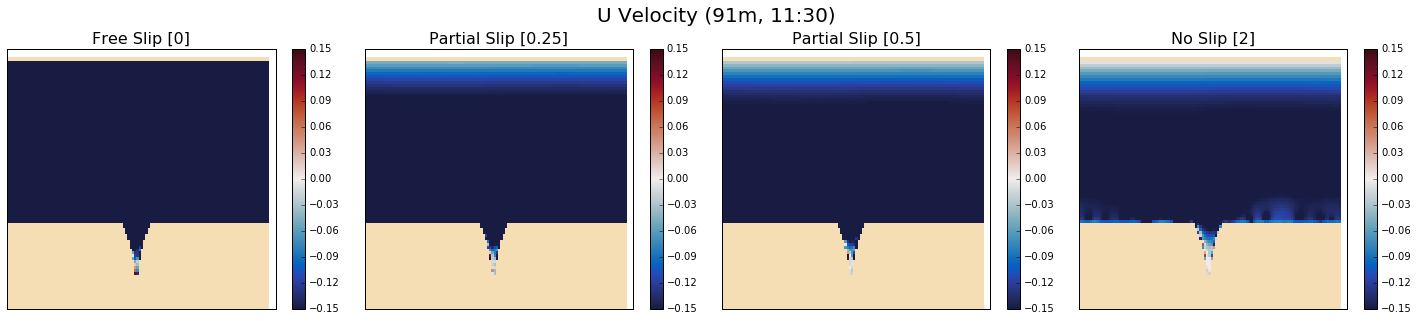

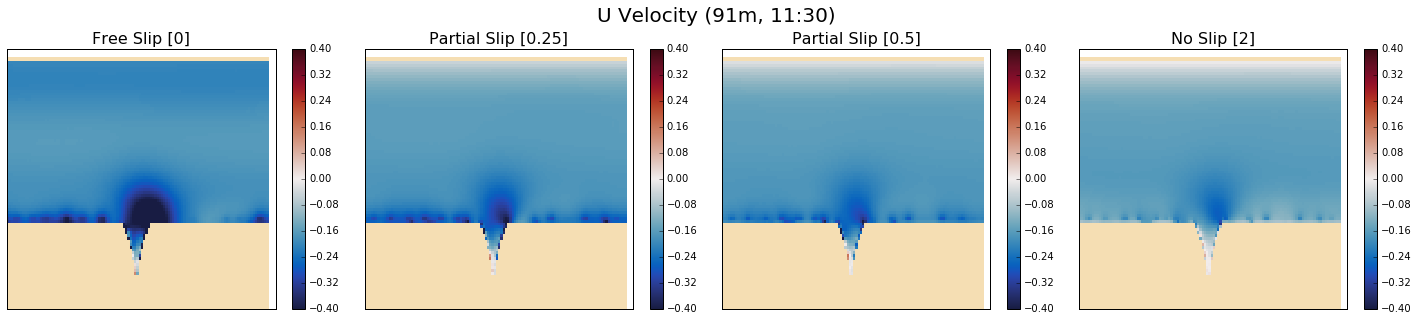

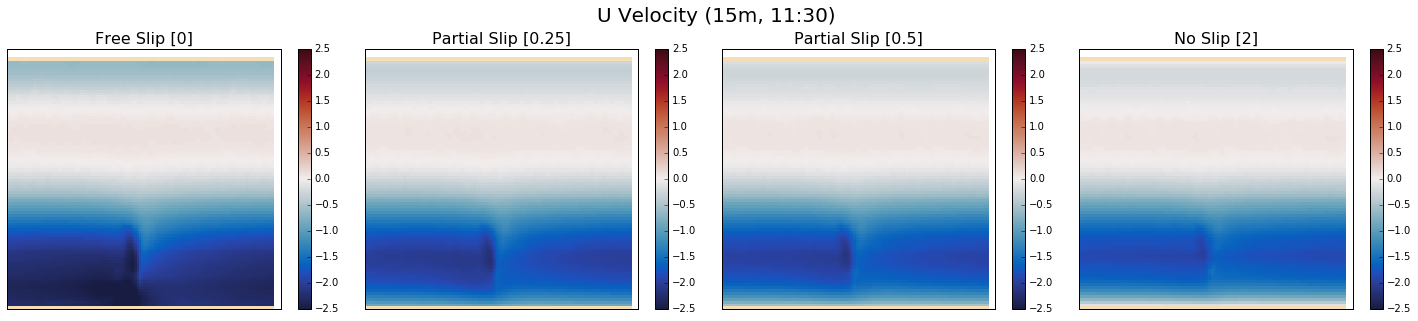

In [70]:
all_vars = [U_I2, U_I3, U_I4, U_I5]; depth_ind = 7; time_ind = 11; bd = [0.15]*4; max_min = True; supttl = 'U Velocity'
ttls = ['Free Slip [0]', 'Partial Slip [0.25]', 'Partial Slip [0.5]', 'No Slip [2]']
fig =  plot_vars(gridT_I2, all_vars, depth_ind, time_ind, bd, cmo.cm.balance, max_min, supttl, ttls)

bd = [0.4]*4
fig =  plot_vars(gridT_I2, all_vars, depth_ind, time_ind, bd, cmo.cm.balance, max_min, supttl, ttls)

depth_ind = 1
bd = [2.5]*4
fig =  plot_vars(gridT_I2, all_vars, depth_ind, time_ind, bd, cmo.cm.balance, max_min, supttl, ttls)

# Run 06 and 07: Diffusivity and Viscosity - key_traldf_eiv

These runs also use **ideal_bathy_01.nc**, **real_bathy_01.nc**, **coords_01.nc**, **temp_strat.nc**, and **salt_strat.nc**.

(Page 178) Laterial diffiusion is set through nameslist parameters in namdyn_ldf (lateral diffusion on momentum) and namtra_ldf (lateral diffusion scheme for tracers) and CPP keys:

| Parameter     |Subroutine|Description| Run04(Id)|Run06(Id)|Run07t(Id)|Run07(Id)|Run08(Id)|Run09(Id)|Run10/1/3(Id)|Run12/4|
|---------------|----------|-----------|----------|---------|---------|---------|---------|
|rn_shlat       |          |slip condition                        |0.5   |0.5|0.5 |0.5 |0.5|0.5|0.5|0.5
|||**Horizontal Tracer Diffusion**||||||||
|ln_traldf_lap  |namtra|laplacian operator (tracer)               |true  |---|--- |--- |---|---|---|
|ln_traldf_bilap|namtra|bilaplacian operator                      |false |---|--- |--- |---|---|---|
|rn_aeiv_0      |namtra|eddy induced velocity coefficient [m2/s]  |0     |0  |2000|50  |50 |150|50 |150
|||**Horizontal Dynamics Viscosity**||||||||
|ln_dynldf_lap  |namdyn|laplacian operator (dynamic)              |true  |---|--- |--- |---|---|---|
|ln_dynldf_bilap|namdyn|bilaplacian operator                      |false |---|--- |--- |---|---|---|
|rn_ahm_0_lap   |namdyn|horizontal laplacian eddy viscosity [m2/s]|100k  |50 |100k|100k|50 |150|150|450

**cpp key definitions:**
* [CONFIG/AMM12/EXP00](http://forge.ipsl.jussieu.fr/little_nemo/changeset/7/trunk/NEMOGCM/CONFIG/AMM12/EXP00) and [Dussin et al (2012)](https://www.drakkar-ocean.eu/publications/reports/orca025-grd100-report-dussin) code above
* [Hewitt et al (2010)](http://geosci-model-dev.net/4/223/2011/gmd-4-223-2011.pdf) (pg 246)
* [Supplementary Material](http://www.geosci-model-dev.net/4/223/2011/gmd-4-223-2011-supplement.pdf) defines Eddy-induced (Gent-McWilliams) advection activated   
* [Vidard et al (2014) NemoTam Manual](https://hal.archives-ouvertes.fr/hal-00941626/document) and [Cerfacs definition](http://www.cerfacs.fr/~maisonna/Dynamite/nemo.html) defines Tracer lateral diffusion eddy induced velocity parameterization
* [Vichi et al (2015)](http://bfm-community.eu/publications/bfmnemomanual_r1.0_201508.pdf) defines Eddy-induced velocity parameterization of enhanced diffusion
* it uses a non-zero value even if I don't include the cpp key, and when I added it, the same run crashed at almost the same spot (1 step before)

**Possible values:**
* The [Salish Sea Model](https://salishsea.eos.ubc.ca/_static/nemo/model_evaluation_summary.pdf) shows that the model uses a horizontal diffusivity and viscosity of 2m$^2$s$^{-1}$ for a resolution of 500 m. My resolution is 4000 m.
* The horizontal viscosity and diffusivity are Laplacian with constant values. Value ranges of 50-500 and 25-100 m$^2$s$^{-1}$, respectively, were tested. The optimum choices were 100 and 50 m$^2$s$^{-1}$, respectively. [Signorini et al: Flow Dynamics of a wide arctic canyon](http://onlinelibrary.wiley.com/store/10.1029/97JC00739/asset/jgrc7033.pdf;jsessionid=D8571410B109560B56CDE3BE82F306CB.f02t03?v=1&t=ixgx7l4a&s=2ddca3e84ffc4c9d22732e0a8c374403b17ea200)

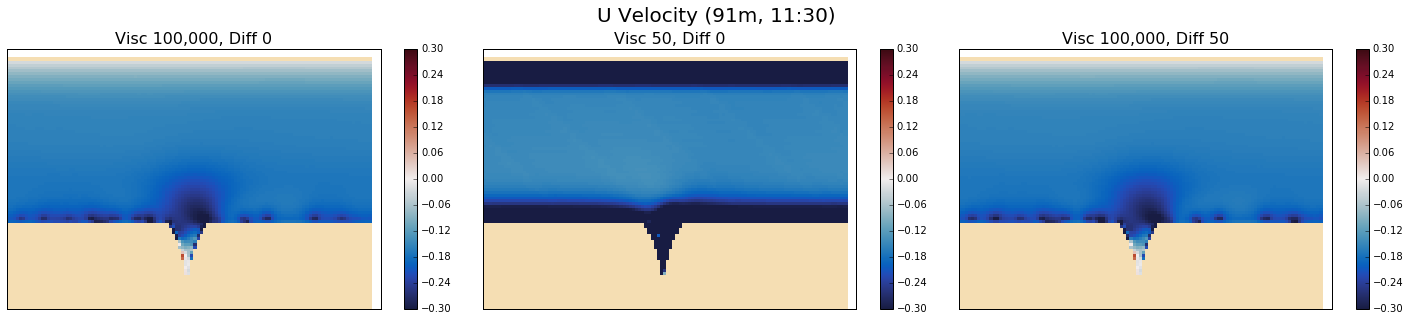

In [31]:
all_vars = [U_I4, U_I6, U_I7]; depth_ind = 7; time_ind = 11; bd = [0.3]*3; max_min = True; supttl = 'U Velocity'
ttls = ['Visc 100,000, Diff 0', 'Visc 50, Diff 0', 'Visc 100,000, Diff 50']
fig =  plot_vars(gridT_I4, all_vars, depth_ind, time_ind, bd, cmo.cm.balance, max_min, supttl, ttls)

In December, I had an accidental overwrite of my gyre runs with orca. The cell below is a comparison between what is my recovered namelist and what it was in October. Zero difference would mean that my model is good to go again.

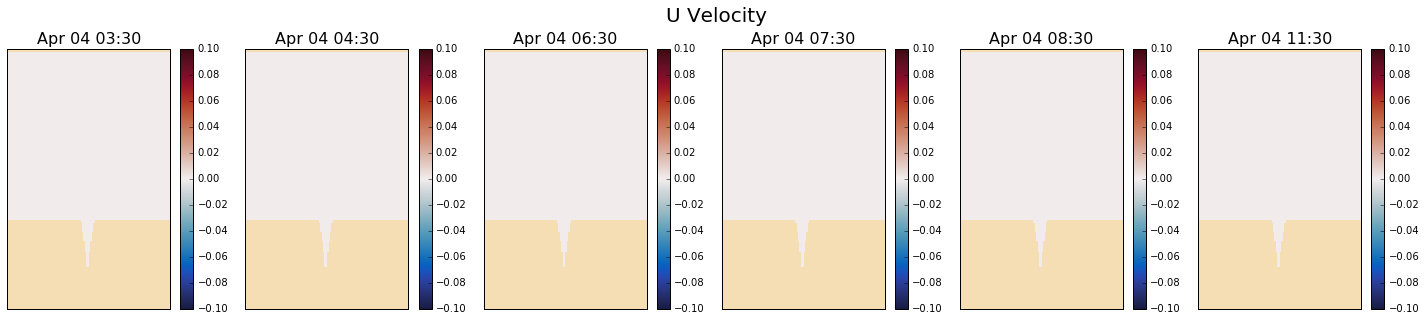

In [38]:
path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_test/compare_gyre02_run06'
gridT_Ic, lon_Ic, lat_Ic, tem_Ic, sal_Ic, ssh_Ic, U_Ic, V_Ic, W_Ic = functions_plot.load_model_output(path, cfg)

dep = 8; time_inds = [3,4,6,7,8,11]; bd = 0.1; max_min = False; supttl = 'U Velocity'
fig = plot_gyre_times(gridT_Ic, np.subtract(U_I6,U_Ic), dep, time_inds, bd, cmo.cm.balance, max_min, supttl)

# Run08: Extended Run
The purpose was to run for 5 days with a spin up of 1 day. It ran to completion!

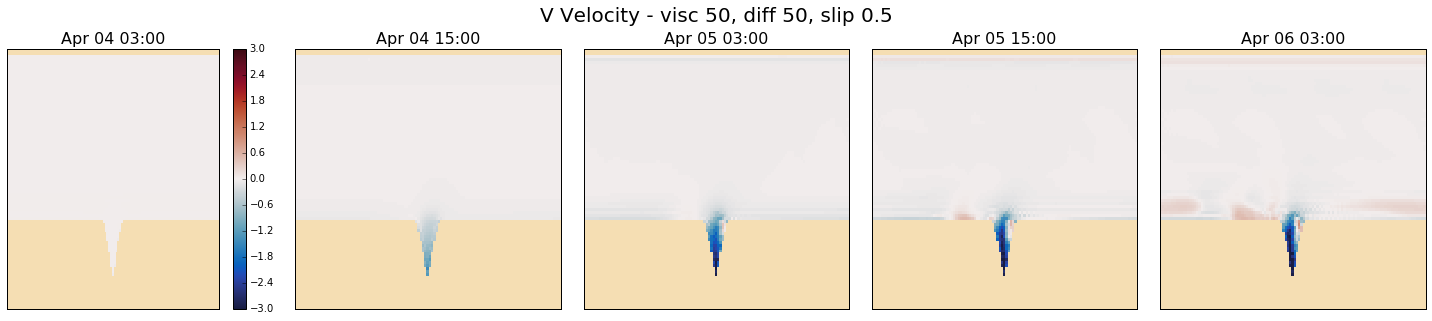

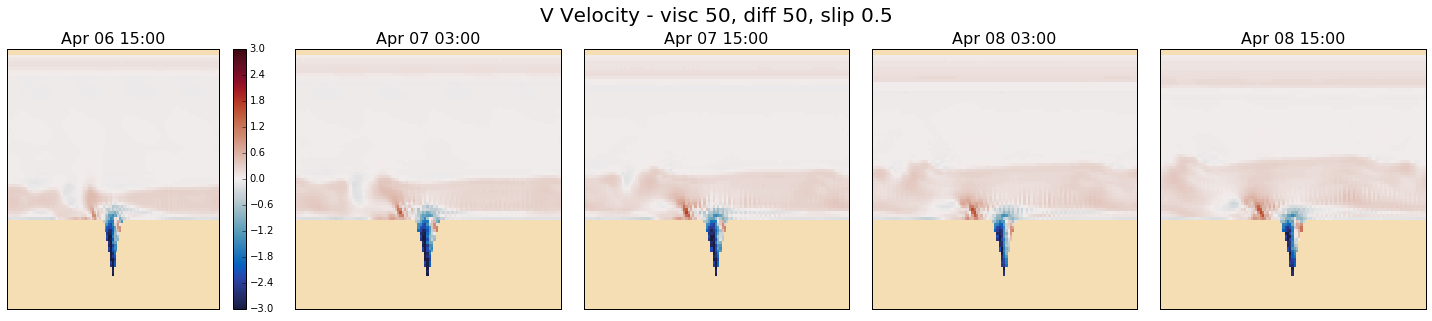

In [61]:
dep = 8; bd = 3.0; max_min = True; supttl = 'V Velocity - visc 50, diff 50, slip 0.5'
time_inds = [0,2,4,6,8]
fig = plot_gyre_times(gridT_I8, V_I8, dep, time_inds, bd, cmo.cm.balance, max_min, supttl)
time_inds = [10,12,14,16,18]
fig = plot_gyre_times(gridT_I8, V_I8, dep, time_inds, bd, cmo.cm.balance, max_min, supttl)

# Run09 - 14: Open Boundary Conditions -  key_bdy

NEMO 3.4 had an OBC module (Open Boundary Conditions - key_obc), but NEMO 3.6 rewrote it as the BDY (Unstructured Open Boundary Conditions - **key_bdy**) module. Separate parameters by comma-space. Make sure you only include these parameters and no more. nambdy_index isn't in namelist_ref. When key_bdy isn't applied, the ocean.output file will not contain the nambdy parameters.


|Parameter|Description (nambdy, namelist_cfg, "key_bdy")|Run08(Id)|Run09-13(Id)|Run14(Id)|
|---------|-----------|---------|--|
|nb_bdy         |number of open bdy sets                              |0|0-3||
|ln_coords_file |read from file (or define in namelist)               |true|false||
|cn_dyn2d       |BC for barotropic variables (U, V, SSH)              |none|flather|orlanski|
|nn_dyn2d_dta   |use the initial state as bdy dta (or from file)      |0|0||
|cn_dyn3d       |BC for baroclinic velocities                         |none|orlanski||
|nn_dyn3d_dta   |use the initial state as bdy dta (or from file)      |0|0||
|cn_tra         |BC for active tracers (T and S)                      |none|neumann||
|nn_tra_dta     |use the initial state as bdy dta (or from file)      |0|0||
|ln_tra_dmp     |tracer damping (open BC for tracers)                 |false|false||
|ln_dyn3d_dmp   |baroclinic velocity damping (open BC for vels)       |false|false||
|rn_time_dmp    |damping time scale (days)                            |1|1||
|rn_time_dmp_out|damping time scale (days) at radiation outflow points|1|1||
|nn_rimwidth    |boundary rim width for Flow Relaxation Scheme        |10|10||

These values are calculated using the conditions specified in NEMO for a regular run. [Question for nemo about BDY namelist](http://www.nemo-ocean.eu/Developing-with-NEMO/Forum/BDY-namelist-in-NEMO-3.6); [SS-run-sets / SalishSea / nemo3.6 / namelist.lateral](https://bitbucket.org/salishsea/ss-run-sets/src/bc2cc3188a7e09e310c0a499e989022926be89e8/SalishSea/nemo3.6/namelist.lateral?at=default&fileviewer=file-view-default); [Understanding the AMM12 Namelist](http://salishsea-meopar-docs.readthedocs.io/en/latest/code-notes/dev-notes/AMM12_namelist.html); [NEMO 3.6 Bugs and Quirks](http://salishsea-meopar-docs.readthedocs.io/en/latest/code-notes/dev-notes/nemo_3-6_quirks.html); [Nemo report on free surface](http://www.nemo-ocean.eu/About-NEMO/Reference-manuals)

|Parameter|nambdy_index           |1        |2        |3        |Run13 test A|Run13 test B, 14|
|--------|------------------------|---------|---------|---------|------------|------------|
|ctypebdy|N, S, E or W            |'N'      |'W'      |'E'      |'N'         |-1|
|nbdyind |constant index (y, x, x)|87-2=85  |2        |117-2=115|85          |  |
|nbdybeg |starting index (x, y, y)|2        |2        |2        |1           |  |
|nbdyend |ending index (x, y, y)  |117-1=116|87-1=86  |87-1=86  |117         |  |

## Run11

**[lines1]** Removal of this line created no difference between Run10 and Run11:

     IF( jperio /= 0 )   CALL ctl_stop( 'Cyclic or symmetric,',   &
     &                                  ' and general open boundary condition are not compatible' )
     cgrid= (/'t','u','v'/)
     
## Run12
 * (66.6%) Pars: same as Run10; kt=  1799 max abs(U):   20.01
 * (65.9%) Pars: 6 ts - 3600(6h) - 600(1h) - 1200(2h); kt=  2374 max abs(U):   20.00 
 * (66.5%) Pars: same as Run10; added key_traldf_eiv (forgot before); kt=  1798 max abs(U):   20.01 
 * (66.5%) Pars: same as Run10; viscosity (rn_ahm_0_lap) 150, diffusivity (rn_aeiv_0) 150; kt=  1798 max abs(U):   20.01
 * **(68.4%) Pars: same as Run10; viscosity (rn_ahm_0_lap) 250, diffusivity (rn_aeiv_0) 150; kt=  1848 max abs(U):   20.00**
 * This is where I realized that the E & W walls are actually gone, but the N is still there!
 * (68.4%) Pars: same as Run10; viscosity (rn_ahm_0_lap) 250, diffusivity (rn_aeiv_0) 250; kt=  1847 max abs(U):   20.00
 * (67.7%) Pars: 6 ts - 3600(6h) - 600(1h) - 1200(2h); kt=  2438 max abs(U):   20.01
 * (**70.5%**) Pars: same as Run10; viscosity (rn_ahm_0_lap) 350, diffusivity (rn_aeiv_0) 150; kt=  1906 max abs(U):   20.01
 * **(72.8%) Pars: same as Run10; viscosity (rn_ahm_0_lap) 450, diffusivity (rn_aeiv_0) 150; kt=  1968 max abs(U):   20.00**
 
## Run13
**[lines2]** 

    IF (lwp) WRITE(numout,*) '**check north seg bounds pckg: ', npckgn(ib)
    IF (jpindt(ib).le.1     )     CALL ctl_stop( 'Start index out of domain' )
    IF (jpinft(ib).ge.jpiglo)     CALL ctl_stop( 'End index out of domain' )
    
**[lines3]**

    ! North segments
    ! get mask at boundary extremities:
    nstop = nstop + 1
    nstop = nstop + 1

1. Using just "1" nambdy_index parameters.
 * 2 Errors: **Open boundary segment does not start/end on land** & NO open boundary corner found
2. Using "Run13 test A"
 * 4 Errors: **Start/End index out of domain** & **Open boundary segment does not start/end on land** & NO open boundary corner found
3. Removals of lines2 and using "Run13 test B"
 * 2 Errors: **Open boundary segment does not start/end on land** & NO open boundary corner found
4. Removals of lines3
 * 0 Errors

## Run14
The boundary condition for *cn_dyn_2d* was changed from 'flather' to 'orlanski' to try to remove the water effects against the northern wall-none-wall. The model broke at kt=527, so the values of viscosity and diffusivity were increased.


|Run |jperio|nb_bdy|lines1 |lines2,3|key_bdy|build||
|----|------|------|-------|-------|-------|-----|-|
|10  |closed|3     |present|present|yes    |yes  |✓|
|11  |closed|3     |removed|present|yes    |yes  |✓|
|12  |cyclic|3     |removed|present|yes    |yes  |✗ 1968|
|13  |cyclic|1     |removed|removed|yes    |no   |✗|
|14  |cyclic|1     |removed|removed|yes    |no   |✓|


   

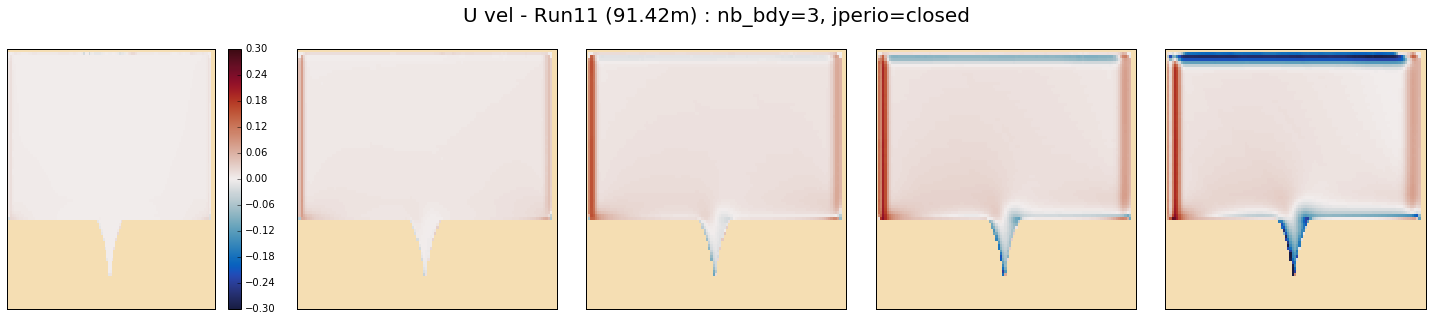

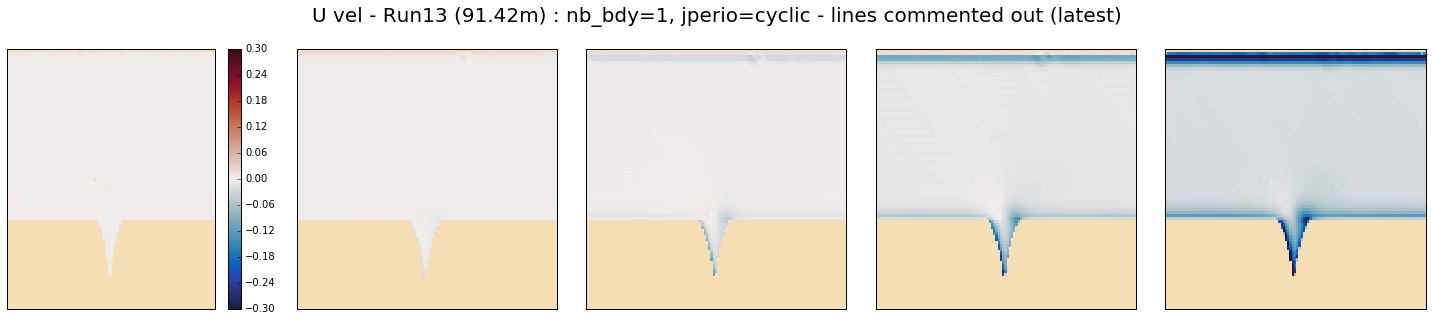

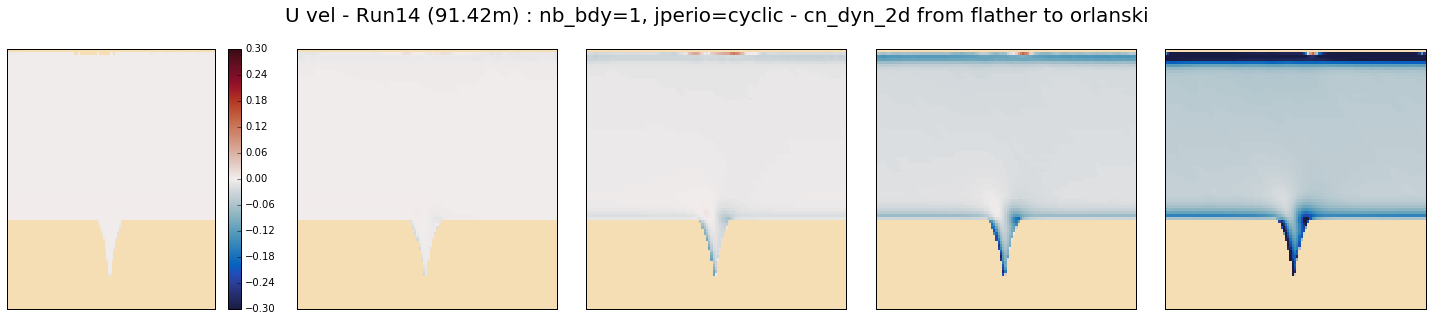

In [59]:
time_inds = [1,2,3,4,5]; dep = 7; dep_str = str(np.round(gridT_I13['deptht'][:][dep],2)); max_min=True
ttl11 = 'U vel - Run11 (' + dep_str + 'm) : nb_bdy=3, jperio=closed'
ttl13 = 'U vel - Run13 (' + dep_str + 'm) : nb_bdy=1, jperio=cyclic - lines commented out (latest)'
ttl14 = 'U vel - Run14 (' + dep_str + 'm) : nb_bdy=1, jperio=cyclic - cn_dyn_2d from flather to orlanski'
fig, ax = plot_gyre_times(gridT_I11, U_I11, dep, time_inds, 0.3, cmo.cm.balance, max_min, ttl11)
fig, ax = plot_gyre_times(gridT_I13, U_I13, dep, time_inds, 0.3, cmo.cm.balance, max_min, ttl13)
fig, ax = plot_gyre_times(gridT_I14, U_I14, dep, time_inds, 0.3, cmo.cm.balance, max_min, ttl14)

# Run15: Longer Runs (Ideal and Real)

http://www.aoml.noaa.gov/phod/jgrc21671.pdf


http://www.whoi.edu/science/PO/people/pickart/pickart_pubs_pdf/pickart_etal_2013_dsr.pdf

http://www.aari.ru/docs/pub/061103/wil06.pdf

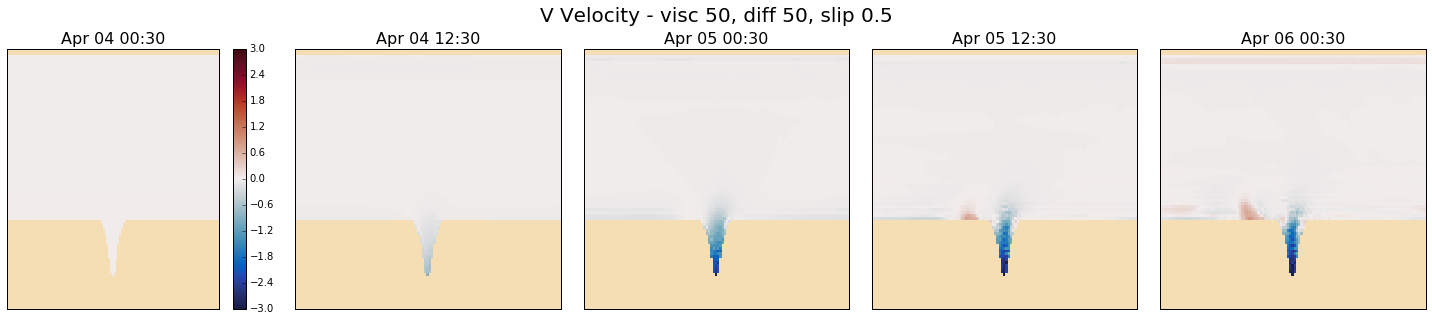

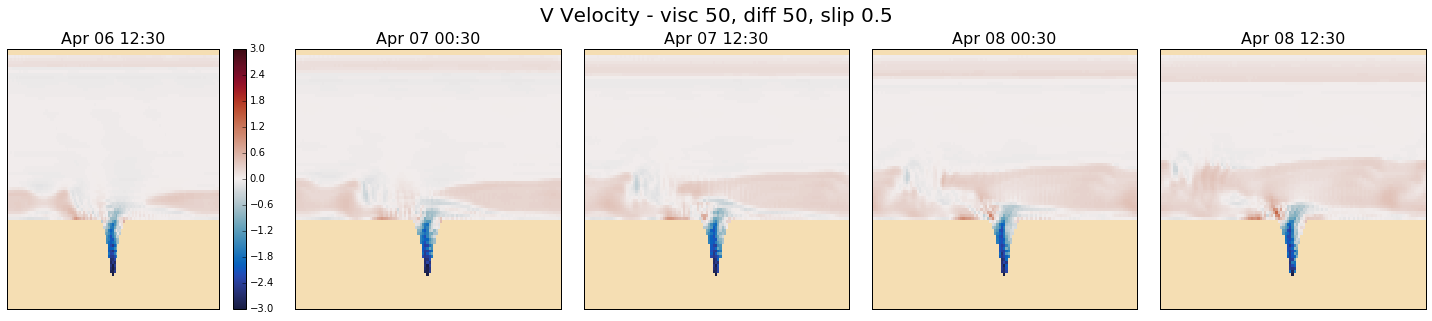

In [78]:
dep = 8; bd = 3.0; max_min = True; supttl = 'V Velocity - visc 50, diff 50, slip 0.5'
time_inds = [x * 6 for x in [0,2,4,6,8]] 
fig = plot_gyre_times(gridT_I15, V_I15, dep, time_inds, bd, cmo.cm.balance, max_min, supttl)
time_inds = [x * 6 for x in [10,12,14,16,18]]
fig = plot_gyre_times(gridT_I15, V_I15, dep, time_inds, bd, cmo.cm.balance, max_min, supttl)